[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya//DataLiteracy/blob/master/Parabolico.ipynb)

# Proyecto de Aula: Movimiento parabólico

Página realizada empleando la herramienta Google Colab para presentar un caso de modelado de un fenómeno físico empleando Python.

<br><br>

## Descripción

Para un objeto con movimiento parabólico:

- $v_0 [m/s]$, velocidad inicial.
- $\theta_0 [radianes]$, ángulo de la velocidad inicial respecto a la tangencial.
- $g [m/s^2]$, aceleración de la gravedad.

La ecuaciones de movimiento:

$$\large v_x = v_0cos\theta_0   $$
$$\large v_y = v_0sin\theta_0 - gt   $$
$$\large x = v_0cos\theta_0 t   $$
$$\large y = v_0sin\theta_0 t - 0.5 gt^2   $$




Tomado de:
- Notas de clase profesor Juan Serna
- http://recursostic.educacion.es/descartes/web/materiales_didacticos/comp_movimientos/parabolico.htm

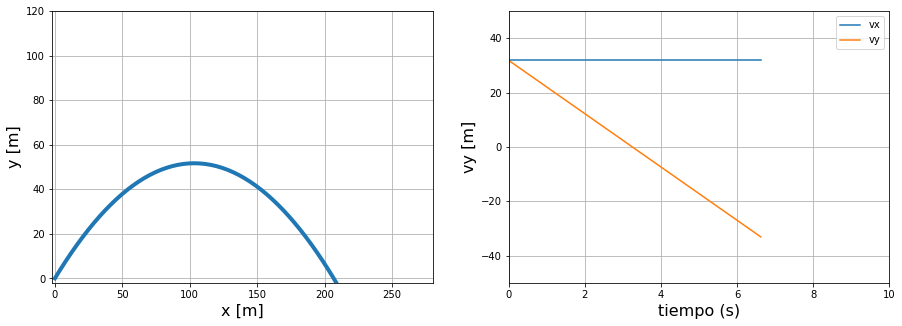

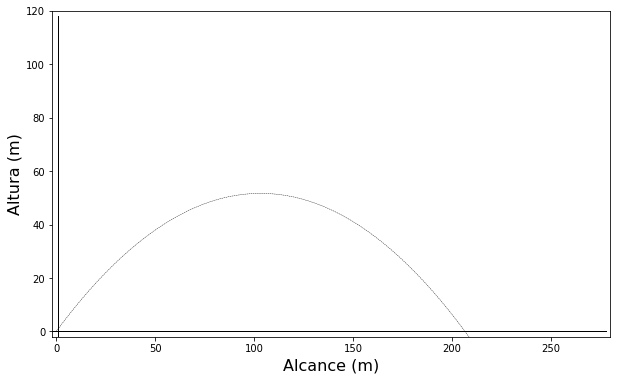

In [ ]:
#@title Entrada de datos
v0 = 45  #@param {type: "slider", min: 1, max: 45, step:1}
theta0 = 45  #@param {type: "slider", min: 0, max: 90, step:5}

import numpy as np
import matplotlib.pyplot as plt

tpasof = 1
tpaso_af = 100       
g = 9.8              

if theta0 == 0:
  theta0 = 0.001
theta0 = theta0*np.pi/180
tmax = 2*v0*np.sin(theta0)/g

t = np.arange(0, tmax+tmax/50, tmax/50)
x = v0*np.cos(theta0)*t
y = v0*np.sin(theta0)*t - 0.5*g*t**2
vx = v0*np.cos(theta0)*np.ones((len(t)))
vy = v0*np.sin(theta0) - g*t

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x, y, lw=4)
ax[0].set_xlabel('x [m]', fontsize=16)
ax[0].set_ylabel('y [m]', fontsize=16)
ax[0].set_xlim((-2, 280))
ax[0].set_ylim((-2, 120))
ax[0].grid(True, which='both')
ax[1].plot(t, vx)
ax[1].set_xlim((0, 10))  #tmax
ax[1].set_ylim((-50, 50))
ax[1].set_xlabel('tiempo (s)', fontsize=16)
ax[1].set_ylabel('vx [m/s]', fontsize=16)
ax[1].plot(t, vy)
ax[1].set_ylabel('vy [m]', fontsize=16)
ax[1].grid(True, which='both')
ax[1].legend(['vx','vy'])
fig.show()

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlim((-2, 280))           
ax.set_ylim((-2, 120))
ax.set_ylabel('Altura (m)', fontsize=16)
ax.set_xlabel('Alcance (m)', fontsize=16)
xpta = np.arange(-2,280,10)
ypta = np.zeros((len(xpta),1))
ax.plot(xpta,ypta,'k',lw=1)
ypta = np.arange(-2,120,10)
xpta = 1.00*np.ones((len(ypta),1))
ax.plot(xpta,ypta,'k',lw=1)
ax.plot(x,y,'k--',lw=0.4)
txt_title = ax.set_title('')
pt1, = ax.plot([], [], 'g.', ms = 30)
txan1 = ax.annotate('', xy=(0, 0), fontsize=14)
txan1.set_animated(True)

In [ ]:
#@title Video
ntotf = len(t)
def drawframe(n):
    tr = t[n]                  
    xg = x[n]
    yg = y[n]
    vxg = vx[n]
    vyg = vy[n]
    pt1.set_data(xg, yg)
    txan1.set_position((xg + 10,yg))
    if vyg > 0:
      labvy = '\u2191'
    else:
      labvy = '\u2193'      
    txan1.set_text('{} vy = {:5.1f} m/s'.format(labvy,vyg))
    txt_title.set_text('Trama {:3.0f}; Tiempo {:4.1f}s/{:4.1f}s; vx = {:.1f} m/s'.format(n,tr,tmax,vxg))
    return pt1, txan1

from matplotlib import animation
anim = animation.FuncAnimation(fig, drawframe, frames=ntotf, interval=tpaso_af, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())